In [2]:
#unzipping the data
!unzip '/content/drive/MyDrive/archive (1).zip'

Archive:  /content/drive/MyDrive/archive (1).zip
  inflating: test_data/test_data/blasti/DSC_6396.jpg  
  inflating: test_data/test_data/blasti/DSC_6397.jpg  
  inflating: test_data/test_data/blasti/DSC_6398.jpg  
  inflating: test_data/test_data/blasti/DSC_6399.jpg  
  inflating: test_data/test_data/blasti/DSC_6400.jpg  
  inflating: test_data/test_data/blasti/DSC_6401.jpg  
  inflating: test_data/test_data/blasti/DSC_6402.jpg  
  inflating: test_data/test_data/blasti/DSC_6403.jpg  
  inflating: test_data/test_data/blasti/DSC_6405.jpg  
  inflating: test_data/test_data/blasti/DSC_6406.jpg  
  inflating: test_data/test_data/blasti/DSC_6407.jpg  
  inflating: test_data/test_data/blasti/DSC_6408.jpg  
  inflating: test_data/test_data/blasti/DSC_6409.jpg  
  inflating: test_data/test_data/blasti/DSC_6410.jpg  
  inflating: test_data/test_data/blasti/DSC_6411.jpg  
  inflating: test_data/test_data/bonegl/DSC_4587.jpg  
  inflating: test_data/test_data/bonegl/DSC_4588.jpg  
  inflating: tes

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
train_gen=ImageDataGenerator(rescale=1./255,horizontal_flip=True,shear_range=0.2)
test_gen=ImageDataGenerator(rescale=(1./255))

In [5]:
train=train_gen.flow_from_directory('/content/train_data/train_data',
                                    target_size=(120,120),
                                    class_mode='categorical',
                                    batch_size=8)
test=test_gen.flow_from_directory('/content/test_data/test_data',
                                  target_size=(120,120),
                                  class_mode='categorical',
                                  batch_size=8)

Found 150 images belonging to 16 classes.
Found 157 images belonging to 16 classes.


In [6]:
train.class_indices

{'blasti': 0,
 'bonegl': 1,
 'brhkyt': 2,
 'cbrtsh': 3,
 'cmnmyn': 4,
 'gretit': 5,
 'hilpig': 6,
 'himbul': 7,
 'himgri': 8,
 'hsparo': 9,
 'indvul': 10,
 'jglowl': 11,
 'lbicrw': 12,
 'mgprob': 13,
 'rebimg': 14,
 'wcrsrt': 15}

In [7]:
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

In [8]:
#Building the model
from tensorflow.keras.models import Sequential

In [9]:
model=Sequential()

In [10]:
model.add(Convolution2D(20,(3,3),activation='relu',input_shape=(120,120,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(45,activation='relu'))
#as there are 16 classes
model.add(Dense(16,activation='softmax'))

In [11]:
#compiling
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [13]:
#training the model
model.fit(train,batch_size=8,validation_data=test,epochs=10)

Epoch 1/10
19/19 [==============================] - 90s 5s/step - loss: 4.5594 - accuracy: 0.0733 - val_loss: 2.7724 - val_accuracy: 0.0955
Epoch 2/10
19/19 [==============================] - 119s 6s/step - loss: 2.7718 - accuracy: 0.1000 - val_loss: 2.8362 - val_accuracy: 0.0446
Epoch 3/10
19/19 [==============================] - 86s 5s/step - loss: 2.7771 - accuracy: 0.0933 - val_loss: 2.7688 - val_accuracy: 0.0955
Epoch 4/10
19/19 [==============================] - 118s 6s/step - loss: 2.7644 - accuracy: 0.1067 - val_loss: 2.7638 - val_accuracy: 0.1019
Epoch 5/10
19/19 [==============================] - 86s 5s/step - loss: 2.7377 - accuracy: 0.1200 - val_loss: 2.8113 - val_accuracy: 0.1083
Epoch 6/10
19/19 [==============================] - 86s 5s/step - loss: 2.7029 - accuracy: 0.1533 - val_loss: 2.7945 - val_accuracy: 0.1656
Epoch 7/10
19/19 [==============================] - 86s 5s/step - loss: 2.6675 - accuracy: 0.1933 - val_loss: 2.7790 - val_accuracy: 0.1274
Epoch 8/10
19/19 [

In [14]:
#testing
import numpy as np
from tensorflow.keras.preprocessing import image

In [15]:
img1=image.load_img('/content/class1.jpeg',target_size=(120,120))
img1=image.img_to_array(img1)
img1=np.expand_dims(img1,axis=0)
pred=np.argmax(model.predict(img1))
print(pred)
output=['blasti','bonegl', 'brhkyt', 'cbrtsh','cmnmyn', 'gretit', 'hilpig', 'himbul', 'himgri','hsparo','indvul', 'jglowl', 'lbicrw', 'mgprob', 'rebimg', 'wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 170ms/step
8
himgri


In [18]:
#eagle
img2=image.load_img('/content/class2.jpeg',target_size=(120,120))
img2=image.img_to_array(img2)
img2=np.expand_dims(img2,axis=0)
pred=np.argmax(model.predict(img2))
print(pred)
output=['blasti','bonegl', 'brhkyt', 'cbrtsh','cmnmyn', 'gretit', 'hilpig', 'himbul', 'himgri','hsparo','indvul', 'jglowl', 'lbicrw', 'mgprob', 'rebimg', 'wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 21ms/step
8
himgri


In [19]:
#kite
img2=image.load_img('/content/class3.jpeg',target_size=(120,120))
img2=image.img_to_array(img2)
img2=np.expand_dims(img2,axis=0)
pred=np.argmax(model.predict(img2))
print(pred)
output=['blasti','bonegl', 'brhkyt', 'cbrtsh','cmnmyn', 'gretit', 'hilpig', 'himbul', 'himgri','hsparo','indvul', 'jglowl', 'lbicrw', 'mgprob', 'rebimg', 'wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 20ms/step
8
himgri


In [26]:
img2=image.load_img('/content/class4.jpeg',target_size=(120,120))

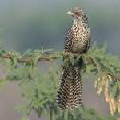

In [27]:
img2

In [28]:
img2=image.img_to_array(img2)
img2=np.expand_dims(img2,axis=0)
pred=np.argmax(model.predict(img2))
print(pred)
output=['blasti','bonegl', 'brhkyt', 'cbrtsh','cmnmyn', 'gretit', 'hilpig', 'himbul', 'himgri','hsparo','indvul', 'jglowl', 'lbicrw', 'mgprob', 'rebimg', 'wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 19ms/step
8
himgri


In [21]:
#myna
img2=image.load_img('/content/class5.jpeg',target_size=(120,120))
img2=image.img_to_array(img2)
img2=np.expand_dims(img2,axis=0)
pred=np.argmax(model.predict(img2))
print(pred)
output=['blasti','bonegl', 'brhkyt', 'cbrtsh','cmnmyn', 'gretit', 'hilpig', 'himbul', 'himgri','hsparo','indvul', 'jglowl', 'lbicrw', 'mgprob', 'rebimg', 'wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 21ms/step
8
himgri


In [23]:
#great tit 
img2=image.load_img('/content/class6.jpeg',target_size=(120,120))
img2=image.img_to_array(img2)
img2=np.expand_dims(img2,axis=0)
pred=np.argmax(model.predict(img2))
print(pred)
output=['blasti','bonegl', 'brhkyt', 'cbrtsh','cmnmyn', 'gretit', 'hilpig', 'himbul', 'himgri','hsparo','indvul', 'jglowl', 'lbicrw', 'mgprob', 'rebimg', 'wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 27ms/step
8
himgri


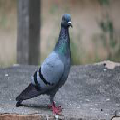

In [30]:
#pigeon
img2=image.load_img('/content/class7.jpeg',target_size=(120,120))
img2

In [31]:
img2=image.img_to_array(img2)
img2=np.expand_dims(img2,axis=0)
pred=np.argmax(model.predict(img2))
print(pred)
output=['blasti','bonegl', 'brhkyt', 'cbrtsh','cmnmyn', 'gretit', 'hilpig', 'himbul', 'himgri','hsparo','indvul', 'jglowl', 'lbicrw', 'mgprob', 'rebimg', 'wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 23ms/step
8
himgri


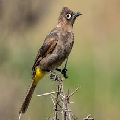

In [32]:
#bulbul
img2=image.load_img('/content/class8.jpeg',target_size=(120,120))
img2

In [33]:
img2=image.img_to_array(img2)
img2=np.expand_dims(img2,axis=0)
pred=np.argmax(model.predict(img2))
print(pred)
output=['blasti','bonegl', 'brhkyt', 'cbrtsh','cmnmyn', 'gretit', 'hilpig', 'himbul', 'himgri','hsparo','indvul', 'jglowl', 'lbicrw', 'mgprob', 'rebimg', 'wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 18ms/step
8
himgri


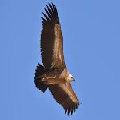

In [34]:
#eurasian griffon vulture
img2=image.load_img('/content/class9.jpeg',target_size=(120,120))
img2

In [35]:
img2=image.img_to_array(img2)
img2=np.expand_dims(img2,axis=0)
pred=np.argmax(model.predict(img2))
print(pred)
output=['blasti','bonegl', 'brhkyt', 'cbrtsh','cmnmyn', 'gretit', 'hilpig', 'himbul', 'himgri','hsparo','indvul', 'jglowl', 'lbicrw', 'mgprob', 'rebimg', 'wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 18ms/step
8
himgri


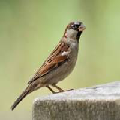

In [36]:
#sparrow
img2=image.load_img('/content/class10.jpeg',target_size=(120,120))
img2

In [37]:
img2=image.img_to_array(img2)
img2=np.expand_dims(img2,axis=0)
pred=np.argmax(model.predict(img2))
print(pred)
output=['blasti','bonegl', 'brhkyt', 'cbrtsh','cmnmyn', 'gretit', 'hilpig', 'himbul', 'himgri','hsparo','indvul', 'jglowl', 'lbicrw', 'mgprob', 'rebimg', 'wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 22ms/step
8
himgri


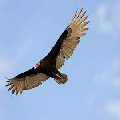

In [38]:
#vulture
img2=image.load_img('/content/class11.jpeg',target_size=(120,120))
img2

In [39]:
img2=image.img_to_array(img2)
img2=np.expand_dims(img2,axis=0)
pred=np.argmax(model.predict(img2))
print(pred)
output=['blasti','bonegl', 'brhkyt', 'cbrtsh','cmnmyn', 'gretit', 'hilpig', 'himbul', 'himgri','hsparo','indvul', 'jglowl', 'lbicrw', 'mgprob', 'rebimg', 'wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 19ms/step
8
himgri


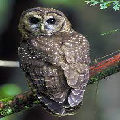

In [40]:
#owl
img2=image.load_img('/content/class12.jpeg',target_size=(120,120))
img2

In [41]:
img2=image.img_to_array(img2)
img2=np.expand_dims(img2,axis=0)
pred=np.argmax(model.predict(img2))
print(pred)
output=['blasti','bonegl', 'brhkyt', 'cbrtsh','cmnmyn', 'gretit', 'hilpig', 'himbul', 'himgri','hsparo','indvul', 'jglowl', 'lbicrw', 'mgprob', 'rebimg', 'wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 19ms/step
7
himbul


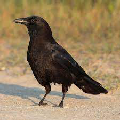

In [42]:
#crow
img2=image.load_img('/content/class13.jpeg',target_size=(120,120))
img2

In [43]:
img2=image.img_to_array(img2)
img2=np.expand_dims(img2,axis=0)
pred=np.argmax(model.predict(img2))
print(pred)
output=['blasti','bonegl', 'brhkyt', 'cbrtsh','cmnmyn', 'gretit', 'hilpig', 'himbul', 'himgri','hsparo','indvul', 'jglowl', 'lbicrw', 'mgprob', 'rebimg', 'wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 27ms/step
13
mgprob


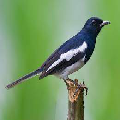

In [44]:
#magpie-robin
img2=image.load_img('/content/class14.jpeg',target_size=(120,120))
img2

In [45]:
img2=image.img_to_array(img2)
img2=np.expand_dims(img2,axis=0)
pred=np.argmax(model.predict(img2))
print(pred)
output=['blasti','bonegl', 'brhkyt', 'cbrtsh','cmnmyn', 'gretit', 'hilpig', 'himbul', 'himgri','hsparo','indvul', 'jglowl', 'lbicrw', 'mgprob', 'rebimg', 'wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 18ms/step
7
himbul


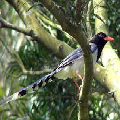

In [47]:
#red-billed blue magpie
img2=image.load_img('/content/class15.jpeg',target_size=(120,120))
img2

In [48]:
img2=image.img_to_array(img2)
img2=np.expand_dims(img2,axis=0)
pred=np.argmax(model.predict(img2))
print(pred)
output=['blasti','bonegl', 'brhkyt', 'cbrtsh','cmnmyn', 'gretit', 'hilpig', 'himbul', 'himgri','hsparo','indvul', 'jglowl', 'lbicrw', 'mgprob', 'rebimg', 'wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 20ms/step
7
himbul


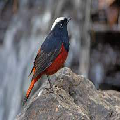

In [49]:
#white-capped redstart
img2=image.load_img('/content/class16.jpeg',target_size=(120,120))
img2

In [50]:
img2=image.img_to_array(img2)
img2=np.expand_dims(img2,axis=0)
pred=np.argmax(model.predict(img2))
print(pred)
output=['blasti','bonegl', 'brhkyt', 'cbrtsh','cmnmyn', 'gretit', 'hilpig', 'himbul', 'himgri','hsparo','indvul', 'jglowl', 'lbicrw', 'mgprob', 'rebimg', 'wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 21ms/step
8
himgri


In [51]:
#tuning the model
from tensorflow.keras.layers import BatchNormalization,Dropout

In [56]:
model=Sequential()
model.add(Convolution2D(12,(3,3),activation='relu',input_shape=(120,120,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
#dropping 20% of data 
model.add(Dropout(0.2))

model.add(Convolution2D(24,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Convolution2D(36,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Convolution2D(36,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Convolution2D(36,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
#even in ANN u can give batch normalization layer
model.add(Dense(62,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(33,activation='relu'))
model.add(Dense(16,activation='relu'))
#as there are 16 classes
model.add(Dense(16,activation='softmax'))

In [57]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 118, 118, 12)      336       
                                                                 
 batch_normalization_4 (Batc  (None, 118, 118, 12)     48        
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 59, 59, 12)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 59, 59, 12)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 57, 57, 24)        2616      
                                                                 
 batch_normalization_5 (Batc  (None, 57, 57, 24)      

In [58]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [59]:
#early stopping
from tensorflow.keras.callbacks import EarlyStopping

In [60]:
early_stop=EarlyStopping(monitor='accuracy',patience=8)

In [61]:
model.fit(train,batch_size=8,validation_data=test,epochs=50,callbacks=early_stop)

Epoch 1/50
19/19 [==============================] - 100s 5s/step - loss: 2.8457 - accuracy: 0.0600 - val_loss: 2.7634 - val_accuracy: 0.1210
Epoch 2/50
19/19 [==============================] - 87s 5s/step - loss: 2.7196 - accuracy: 0.1067 - val_loss: 2.7542 - val_accuracy: 0.1274
Epoch 3/50
19/19 [==============================] - 119s 7s/step - loss: 2.6406 - accuracy: 0.1800 - val_loss: 2.7453 - val_accuracy: 0.1274
Epoch 4/50
19/19 [==============================] - 87s 5s/step - loss: 2.6546 - accuracy: 0.1600 - val_loss: 2.7275 - val_accuracy: 0.1529
Epoch 5/50
19/19 [==============================] - 87s 5s/step - loss: 2.5585 - accuracy: 0.2067 - val_loss: 2.7284 - val_accuracy: 0.2102
Epoch 6/50
19/19 [==============================] - 119s 7s/step - loss: 2.5553 - accuracy: 0.2400 - val_loss: 2.7379 - val_accuracy: 0.1338
Epoch 7/50
19/19 [==============================] - 90s 5s/step - loss: 2.5179 - accuracy: 0.2467 - val_loss: 2.7575 - val_accuracy: 0.0955
Epoch 8/50
19/19 

In [62]:
#testing
import numpy as np
from tensorflow.keras.preprocessing import image

In [63]:
img1=image.load_img('/content/class1.jpeg',target_size=(120,120))
img1=image.img_to_array(img1)
img1=np.expand_dims(img1,axis=0)
pred=np.argmax(model.predict(img1))
print(pred)
output=['blasti','bonegl', 'brhkyt', 'cbrtsh','cmnmyn', 'gretit', 'hilpig', 'himbul', 'himgri','hsparo','indvul', 'jglowl', 'lbicrw', 'mgprob', 'rebimg', 'wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 301ms/step
10
indvul


In [64]:
#eagle
img2=image.load_img('/content/class2.jpeg',target_size=(120,120))
img2=image.img_to_array(img2)
img2=np.expand_dims(img2,axis=0)
pred=np.argmax(model.predict(img2))
print(pred)
output=['blasti','bonegl', 'brhkyt', 'cbrtsh','cmnmyn', 'gretit', 'hilpig', 'himbul', 'himgri','hsparo','indvul', 'jglowl', 'lbicrw', 'mgprob', 'rebimg', 'wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 29ms/step
10
indvul


In [65]:
#kite
img2=image.load_img('/content/class3.jpeg',target_size=(120,120))
img2=image.img_to_array(img2)
img2=np.expand_dims(img2,axis=0)
pred=np.argmax(model.predict(img2))
print(pred)
output=['blasti','bonegl', 'brhkyt', 'cbrtsh','cmnmyn', 'gretit', 'hilpig', 'himbul', 'himgri','hsparo','indvul', 'jglowl', 'lbicrw', 'mgprob', 'rebimg', 'wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 19ms/step
10
indvul


In [66]:
img2=image.load_img('/content/class4.jpeg',target_size=(120,120))

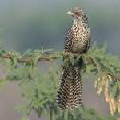

In [67]:
img2

In [68]:
img2=image.img_to_array(img2)
img2=np.expand_dims(img2,axis=0)
pred=np.argmax(model.predict(img2))
print(pred)
output=['blasti','bonegl', 'brhkyt', 'cbrtsh','cmnmyn', 'gretit', 'hilpig', 'himbul', 'himgri','hsparo','indvul', 'jglowl', 'lbicrw', 'mgprob', 'rebimg', 'wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 18ms/step
10
indvul


In [69]:
#myna
img2=image.load_img('/content/class5.jpeg',target_size=(120,120))
img2=image.img_to_array(img2)
img2=np.expand_dims(img2,axis=0)
pred=np.argmax(model.predict(img2))
print(pred)
output=['blasti','bonegl', 'brhkyt', 'cbrtsh','cmnmyn', 'gretit', 'hilpig', 'himbul', 'himgri','hsparo','indvul', 'jglowl', 'lbicrw', 'mgprob', 'rebimg', 'wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 20ms/step
10
indvul


In [70]:
#great tit 
img2=image.load_img('/content/class6.jpeg',target_size=(120,120))
img2=image.img_to_array(img2)
img2=np.expand_dims(img2,axis=0)
pred=np.argmax(model.predict(img2))
print(pred)
output=['blasti','bonegl', 'brhkyt', 'cbrtsh','cmnmyn', 'gretit', 'hilpig', 'himbul', 'himgri','hsparo','indvul', 'jglowl', 'lbicrw', 'mgprob', 'rebimg', 'wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 21ms/step
10
indvul


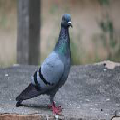

In [71]:
#pigeon
img2=image.load_img('/content/class7.jpeg',target_size=(120,120))
img2

In [72]:
img2=image.img_to_array(img2)
img2=np.expand_dims(img2,axis=0)
pred=np.argmax(model.predict(img2))
print(pred)
output=['blasti','bonegl', 'brhkyt', 'cbrtsh','cmnmyn', 'gretit', 'hilpig', 'himbul', 'himgri','hsparo','indvul', 'jglowl', 'lbicrw', 'mgprob', 'rebimg', 'wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 20ms/step
10
indvul


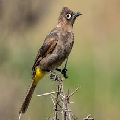

In [73]:
#bulbul
img2=image.load_img('/content/class8.jpeg',target_size=(120,120))
img2

In [74]:
img2=image.img_to_array(img2)
img2=np.expand_dims(img2,axis=0)
pred=np.argmax(model.predict(img2))
print(pred)
output=['blasti','bonegl', 'brhkyt', 'cbrtsh','cmnmyn', 'gretit', 'hilpig', 'himbul', 'himgri','hsparo','indvul', 'jglowl', 'lbicrw', 'mgprob', 'rebimg', 'wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 22ms/step
2
brhkyt


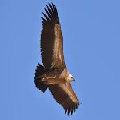

In [75]:
#eurasian griffon vulture
img2=image.load_img('/content/class9.jpeg',target_size=(120,120))
img2

In [ ]:
img2=image.img_to_array(img2)
img2=np.expand_dims(img2,axis=0)
pred=np.argmax(model.predict(img2))
print(pred)
output=['blasti','bonegl', 'brhkyt', 'cbrtsh','cmnmyn', 'gretit', 'hilpig', 'himbul', 'himgri','hsparo','indvul', 'jglowl', 'lbicrw', 'mgprob', 'rebimg', 'wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 18ms/step
8
himgri


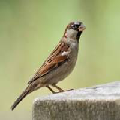

In [76]:
#sparrow
img2=image.load_img('/content/class10.jpeg',target_size=(120,120))
img2

In [77]:
img2=image.img_to_array(img2)
img2=np.expand_dims(img2,axis=0)
pred=np.argmax(model.predict(img2))
print(pred)
output=['blasti','bonegl', 'brhkyt', 'cbrtsh','cmnmyn', 'gretit', 'hilpig', 'himbul', 'himgri','hsparo','indvul', 'jglowl', 'lbicrw', 'mgprob', 'rebimg', 'wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 20ms/step
2
brhkyt


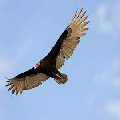

In [78]:
#vulture
img2=image.load_img('/content/class11.jpeg',target_size=(120,120))
img2

In [79]:
img2=image.img_to_array(img2)
img2=np.expand_dims(img2,axis=0)
pred=np.argmax(model.predict(img2))
print(pred)
output=['blasti','bonegl', 'brhkyt', 'cbrtsh','cmnmyn', 'gretit', 'hilpig', 'himbul', 'himgri','hsparo','indvul', 'jglowl', 'lbicrw', 'mgprob', 'rebimg', 'wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 22ms/step
10
indvul


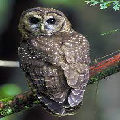

In [80]:
#owl
img2=image.load_img('/content/class12.jpeg',target_size=(120,120))
img2

In [81]:
img2=image.img_to_array(img2)
img2=np.expand_dims(img2,axis=0)
pred=np.argmax(model.predict(img2))
print(pred)
output=['blasti','bonegl', 'brhkyt', 'cbrtsh','cmnmyn', 'gretit', 'hilpig', 'himbul', 'himgri','hsparo','indvul', 'jglowl', 'lbicrw', 'mgprob', 'rebimg', 'wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 19ms/step
4
cmnmyn


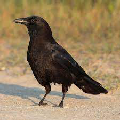

In [82]:
#crow
img2=image.load_img('/content/class13.jpeg',target_size=(120,120))
img2

In [83]:
img2=image.img_to_array(img2)
img2=np.expand_dims(img2,axis=0)
pred=np.argmax(model.predict(img2))
print(pred)
output=['blasti','bonegl', 'brhkyt', 'cbrtsh','cmnmyn', 'gretit', 'hilpig', 'himbul', 'himgri','hsparo','indvul', 'jglowl', 'lbicrw', 'mgprob', 'rebimg', 'wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 19ms/step
2
brhkyt


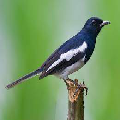

In [84]:
#magpie-robin
img2=image.load_img('/content/class14.jpeg',target_size=(120,120))
img2

In [85]:
img2=image.img_to_array(img2)
img2=np.expand_dims(img2,axis=0)
pred=np.argmax(model.predict(img2))
print(pred)
output=['blasti','bonegl', 'brhkyt', 'cbrtsh','cmnmyn', 'gretit', 'hilpig', 'himbul', 'himgri','hsparo','indvul', 'jglowl', 'lbicrw', 'mgprob', 'rebimg', 'wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 20ms/step
10
indvul


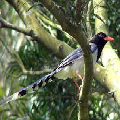

In [86]:
#red-billed blue magpie
img2=image.load_img('/content/class15.jpeg',target_size=(120,120))
img2

In [87]:
img2=image.img_to_array(img2)
img2=np.expand_dims(img2,axis=0)
pred=np.argmax(model.predict(img2))
print(pred)
output=['blasti','bonegl', 'brhkyt', 'cbrtsh','cmnmyn', 'gretit', 'hilpig', 'himbul', 'himgri','hsparo','indvul', 'jglowl', 'lbicrw', 'mgprob', 'rebimg', 'wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 19ms/step
2
brhkyt


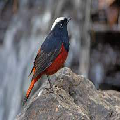

In [88]:
#white-capped redstart
img2=image.load_img('/content/class16.jpeg',target_size=(120,120))
img2

In [89]:
img2=image.img_to_array(img2)
img2=np.expand_dims(img2,axis=0)
pred=np.argmax(model.predict(img2))
print(pred)
output=['blasti','bonegl', 'brhkyt', 'cbrtsh','cmnmyn', 'gretit', 'hilpig', 'himbul', 'himgri','hsparo','indvul', 'jglowl', 'lbicrw', 'mgprob', 'rebimg', 'wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 19ms/step
10
indvul
